<a href="https://colab.research.google.com/github/vikash-chaurasia108/ORC/blob/master/Project_1_Airlines_ticket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict fare of Airline ticket

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_excel('Data_Train.xlsx')

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Assign_1
###### 1. Deal with missing values.
###### 2. Data cleaning to make our data ready for the analysis as well as modelling purpose. 

In [ ]:
train_data.shape

(10683, 11)

In [ ]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.dropna(inplace = True)

In [ ]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [ ]:
#train_data.dtypes

In [ ]:
def change_into_DateTime(col):
  train_data[col] = pd.to_datetime(train_data[col])

In [ ]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for i in ['Date_of_Journey', 'Dep_Time',  'Arrival_Time']:
  change_into_DateTime(i)


In [ ]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-16 05:50:00,2021-07-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-16 18:05:00,2021-07-16 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-16 16:50:00,2021-07-16 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
train_data.drop('Date_of_Journey', axis =1, inplace= True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-16 05:50:00,2021-07-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-16 18:05:00,2021-07-16 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-16 16:50:00,2021-07-16 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
def extract_hour(df, col):
  df[col + '_hour']  = df[col].dt.hour 

def extract_min(df, col):
  df[col + '_min']  = df[col].dt.minute

def drop_column(df, col):
  df.drop(col, axis =1, inplace = True) 

In [ ]:
extract_hour(train_data, 'Dep_Time')
extract_min(train_data, 'Dep_Time')
drop_column(train_data, 'Dep_Time')

In [ ]:
extract_hour(train_data, 'Arrival_Time')
extract_min(train_data, 'Arrival_Time')
drop_column(train_data, 'Arrival_Time')

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
duration = list(train_data['Duration'])
                

In [ ]:
for i in range(len(duration)):
  if len(duration[i].split(' ')) == 2:
    pass
  else:
    if 'h' in duration[i]:
      duration[i] = duration[i] + ' 0m'
    else:
      duration[i] = '0h ' + duration[i]
      


In [ ]:
train_data['Duration'] = duration

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
def hour(x):
  return x.split(' ')[0][0:-1]

def minute(x):
  return x.split(' ')[1][0:-1]

In [ ]:
train_data['duration_hour'] = train_data['Duration'].apply(hour)
train_data['duration_mins'] = train_data['Duration'].apply(minute)
drop_column(train_data, 'Duration')

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration_hour        object
duration_mins        object
dtype: object

In [ ]:
train_data['duration_hour'] = train_data['duration_hour'].astype(int)
train_data['duration_mins'] = train_data['duration_mins'].astype(int)

In [ ]:
cat_col = [col for col in train_data.columns if train_data[col].dtypes == 'O']
cat_col


['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
count_col = [col for col in train_data.columns if train_data[col].dtypes != 'O']
count_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'duration_hour',
 'duration_mins']

In [ ]:
#Nominal Data = Onehot
#Ordinal Data = Labelencoder

In [ ]:
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
#categorical['Airline'].value_counts()

In [ ]:
#plt.figure(figsize = (20,10))
#sns.boxplot(x = 'Airline', y = 'Price', data = train_data.sort_values('Price', ascending = False))

In [ ]:
#categorical.head()

In [ ]:
Airline = pd.get_dummies(categorical['Airline'], drop_first = True)
#Airline.head()

In [ ]:
'''
for i in range(len(cat_col)):
  #plt.figure(figsize = (10,4))
  #sns.boxplot(x = i, y = 'Price', data = train_data.sort_values('Price', ascending = False))

  cat_col[i] = pd.get_dummies(categorical[cat_col[i]], drop_first = True)
'''    

"\nfor i in range(len(cat_col)):\n  #plt.figure(figsize = (10,4))\n  #sns.boxplot(x = i, y = 'Price', data = train_data.sort_values('Price', ascending = False))\n\n  cat_col[i] = pd.get_dummies(categorical[cat_col[i]], drop_first = True)\n"

In [ ]:
Source = pd.get_dummies(categorical['Source'], drop_first = True)
#Source.head()


In [ ]:
Destination = pd.get_dummies(categorical['Destination'], drop_first = True)
#Destination.head()

In [ ]:
Route = categorical['Route'].str.split(r"[\W']+")
Route_ = ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']
for i in range(len(Route_)):
  categorical['Route_' + str(i)]= Route.str[i]

categorical['Route_1']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0        DEL
1        IXR
2        LKO
3        NAG
4        NAG
        ... 
10678    BLR
10679    BLR
10680    DEL
10681    DEL
10682    GOI
Name: Route_1, Length: 10682, dtype: object

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_0,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
drop_column(categorical, 'Route')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_0                0
Route_1                0
Route_2             3491
Route_3             9116
Route_4            10636
dtype: int64

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_0', 'Route_1', 'Route_2', 'Route_3', 'Route_4'],
      dtype='object')

In [ ]:

for i in ['Route_2', 'Route_3', 'Route_4']:
  categorical[i].fillna('None', inplace = True)
categorical.isnull().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_0            0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
dtype: int64

In [ ]:
for i in categorical.columns:
  print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))


Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_0 has total 5 categories
Route_1 has total 40 categories
Route_2 has total 27 categories
Route_3 has total 12 categories
Route_4 has total 6 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [ ]:
for i in ['Route_0', 'Route_1', 'Route_2', 'Route_3', 'Route_4']:
  categorical[i] = encoder.fit_transform(categorical[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_0,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,10,21,10,4
1,Air India,Kolkata,Banglore,2 stops,No info,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,29,7,10,4


In [ ]:
drop_column(categorical, 'Additional_Info')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops': 3, '4 stops':4}

In [ ]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_0,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,0,0,10,21,10,4
1,Air India,Kolkata,Banglore,2,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,2,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,1,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,1,0,29,7,10,4


In [ ]:
data_train = pd.concat([categorical,Airline, Source, Destination, train_data[count_col]], axis =1)


In [ ]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_0,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [ ]:

drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')


In [ ]:
data_train.head()

,Total_Stops,Route_0,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [ ]:
pd.set_option('display.max_columns', 35)
data_train.head()

,Total_Stops,Route_0,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


## How to handle outliers in data

##### 1. Outlier detection and outlier imputation if available in data
##### 2. Separate out your independent feature and dependent feature.


In [ ]:
 def plot(df, col):
   fig, (ax1, ax2) = plt.subplots(2, 1)
   sns.distplot(df[col], ax= ax1)
   sns.boxplot(df[col], ax= ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


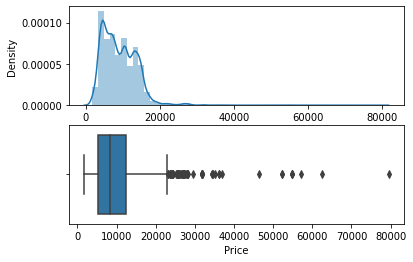

In [ ]:
plot(data_train, 'Price')

In [ ]:
data_train['Price'] = np.where(data_train['Price'] >= 40000, data_train['Price'].median(), data_train['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


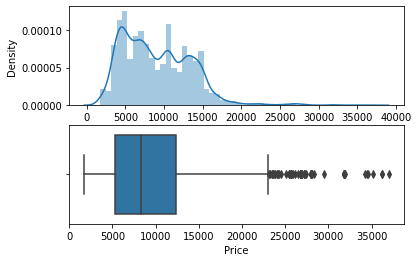

In [ ]:
plot(data_train, 'Price')

In [ ]:
X = data_train.drop('Price', axis= 1)
print(data_train.shape)
X.shape


(10682, 35)


(10682, 34)

In [ ]:
y = data_train['Price']


## Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,y)

array([2.15631577, 2.0237979 , 2.40953591, 2.21085569, 1.09564908,
       1.80544643, 0.77265893, 0.0985182 , 0.68513229, 0.91358058,
       0.00420701, 0.57580408, 0.01322267, 0.32077517, 0.00845992,
       0.21349389, 0.        , 0.16146581, 1.51727994, 0.86693129,
       0.31152905, 1.54649268, 0.4082717 , 0.29892953, 0.16980392,
       0.37473082, 1.06309312, 0.88901586, 1.47117756, 1.20476368,
       1.86721572, 1.54263026, 1.8008928 , 1.07734383])

In [ ]:
imp = pd.DataFrame(mutual_info_classif(X,y), index = X.columns)
imp

,0
Total_Stops,2.172983
Route_0,2.027169
Route_1,2.446145
Route_2,2.203865
Route_3,1.070205
Route_4,1.815040
Air India,0.767614
GoAir,0.098181
IndiGo,0.679157
Jet Airways,0.925693


In [ ]:
imp.columns = ['importance']
imp.sort_values(by = 'importance', ascending = False)

,importance
Route_1,2.446145
Route_2,2.203865
Total_Stops,2.172983
Route_0,2.027169
Arrival_Time_hour,1.853582
Route_4,1.815040
duration_hour,1.777913
Cochin,1.555350
Delhi,1.524984
Arrival_Time_min,1.490117


### Random Forest model


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  print('training score: {}'.format(model.score(X_train, y_train)))
  y_prediction = model.predict(X_test)
  print('predictions are: {}'.format(y_prediction))

  r2_score = metrics.r2_score(y_test, y_prediction)
  print('r2_score is: {}'.format(r2_score))

  print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
  print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
  print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))

  sns.distplot(y_test-y_prediction)

training score: 0.9520145059165012
predictions are: [ 4006.05266667 12274.01        2088.358      ...  5522.61
 14151.54        4804.        ]
r2_score is: 0.8254895391673739
MAE: 1082.1131134265308
MSE: 3253492.97568397
RMSE: 1803.74415471928


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


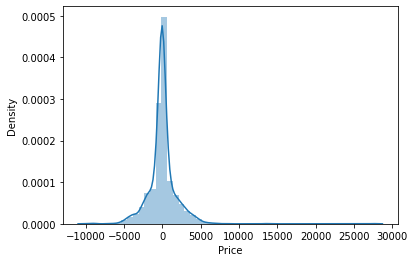

In [ ]:
predict(RandomForestRegressor())  ## Random Forest Algorithm

training score: 0.6182468929210553
predictions are: [ 3440.75089972 12209.76123934  2647.78348538 ...  5772.91047828
 15208.65092829  3478.74412486]
r2_score is: 0.6005387900117704
MAE: 1975.9014274058406
MSE: 7447371.547551066
RMSE: 2728.9872750804584


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


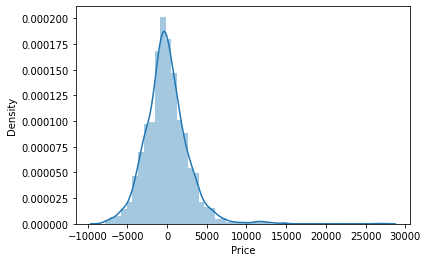

In [ ]:
predict(LinearRegression()) ## Linear Regression Algorithm

training score: 0.7793411831254239
predictions are: [ 4227.  12680.8  2038.2 ...  5259.8 12132.6  4804. ]
r2_score is: 0.6269323858280782
MAE: 1748.8907814693496
MSE: 6955301.455124005
RMSE: 2637.290551896777


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


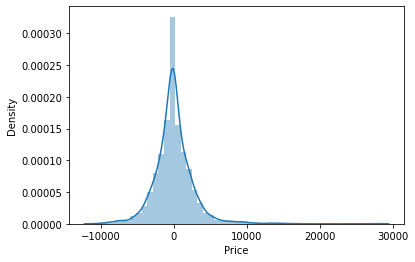

In [ ]:
predict(KNeighborsRegressor())  ## KNN algorithm

training score: 0.9654649932689691
predictions are: [ 3857. 11753.  2227. ...  5228. 12410.  4804.]
r2_score is: 0.7390572299125979
MAE: 1209.9791218218686
MSE: 4864897.298902538
RMSE: 2205.651218779283


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


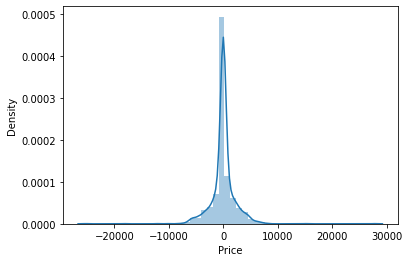

In [ ]:
predict(DecisionTreeRegressor()) ## Decision Tree algorithm

## Hypertune the model

In [ ]:
Reg_rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 1200, num= 6)]
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 4)]

In [ ]:
random_grid = { 
    'n_estimators': n_estimators,
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth,
    'min_samples_split': [ 5, 10, 15 ,50]
}

In [ ]:
random_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 50],
 'n_estimators': [100, 320, 540, 760, 980, 1200]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = Reg_rf, param_distributions = random_grid, cv= 3, verbose =2, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 21,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 760}

In [ ]:
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


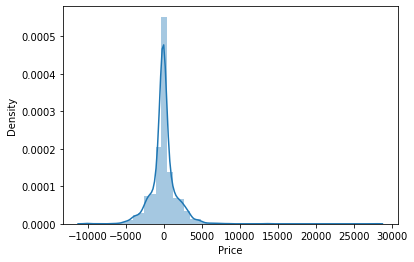

In [ ]:
sns.distplot(y_test-prediction)

In [ ]:
metrics.r2_score(y_test, prediction)

0.8377262945904301

In [ ]:
import pickle

In [ ]:
import gc
import pickle
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pick_insert = open('/content/drive/MyDrive/Data science_ML_on colab/rf_random_model.pkl','wb')
pickle.dump(rf_random, pick_insert)
pick_insert.close()

pick_read = open('/content/drive/MyDrive/Data science_ML_on colab/rf_random_model.pkl','rb')
my_rf_model = pickle.load(pick_read)
my_rf_model

Mounted at /content/drive


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
prediction_3 = my_rf_model.predict(X_test)
prediction_3

array([ 3982.6556267 , 12228.38477918,  2056.33714352, ...,
        5412.37955965, 14141.86506944,  4785.49473242])